In [4]:
import numpy as np
import pandas as pd

In [6]:
X_train = pd.read_csv("Dataset/input.csv")
y_train = pd.read_csv("Dataset/labels.csv")
X_test = pd.read_csv("Dataset/input_test.csv")
y_test = pd.read_csv("Dataset/labels_test.csv")

In [8]:
# Convert DataFrame columns to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Reshape the arrays
X_train = X_train.reshape(len(X_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (1999, 100, 100, 3)
Shape of y_train:  (1999, 1)
Shape of X_test:  (399, 100, 100, 3)
Shape of y_test:  (399, 1)


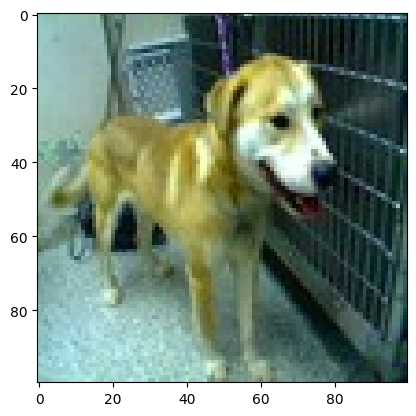

In [11]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [14]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [16]:
model.fit(X_train,y_train,epochs=10,batch_size=64)

Epoch 1/10


32/32 [==============================] - 85s 487ms/step - loss: 0.6918 - accuracy: 0.5123
Epoch 2/10
32/32 [==============================] - 5s 170ms/step - loss: 0.6520 - accuracy: 0.6143
Epoch 3/10
32/32 [==============================] - 5s 165ms/step - loss: 0.5919 - accuracy: 0.6718
Epoch 4/10
32/32 [==============================] - 5s 145ms/step - loss: 0.5238 - accuracy: 0.7424
Epoch 5/10
32/32 [==============================] - 5s 146ms/step - loss: 0.4728 - accuracy: 0.7719
Epoch 6/10
32/32 [==============================] - 4s 139ms/step - loss: 0.4174 - accuracy: 0.8134
Epoch 7/10
32/32 [==============================] - 5s 148ms/step - loss: 0.3533 - accuracy: 0.8439
Epoch 8/10
32/32 [==============================] - 5s 151ms/step - loss: 0.3089 - accuracy: 0.8754
Epoch 9/10
32/32 [==============================] - 5s 145ms/step - loss: 0.2614 - accuracy: 0.8954
Epoch 10/10
32/32 [==============================] - 5s 160ms/step - loss: 0.2041 - accuracy: 0.9

In [17]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 194s 36ms/step - loss: 0.7023 - accuracy: 0.7093


[0.7023480534553528, 0.7092731595039368]